<a href="https://colab.research.google.com/github/SezarTheGreat/Machine-learning-and-Deep-Learning/blob/main/CNN_Project_KARNAGE69_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN project for sign language**
This project is primarily made for learning deep learning and CNN.
For more info on CNN visit this link - https://sharathmanjunath.medium.com/convolutional-neural-network-and-keras-mixed-data-input-part-1-by-sharath-manjunath-24f73c530584

Before running the model, change the runtime to the T4 gpu.

For the dataset to be loaded, uncomment the first cell and run the first cell once to clone the following dataset for the project. If the folloring %ls command works, proceed further

In [70]:
#!git clone https://github.com/karnage69/newapk.git
#%ls

In [71]:
#Importing the necessary libraries.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os

In [72]:
#Prepraing the following Dataset.

# Set the data paths
train_dir = "/content/newapk/archive/asl_alphabet_train/asl_alphabet_train"
test_dir = "/content/newapk/archive/asl_alphabet_test"

img_height, img_width = 64, 64
batch_size = 64

train_data = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

val_data = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

test_data = keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

# Get class names from the training data
class_names = train_data.class_names
num_classes = len(class_names)
print(f"Found {num_classes} classes: {class_names}")

print("Datasets prepared.")

Found 87000 files belonging to 29 classes.
Using 69600 files for training.
Found 87000 files belonging to 29 classes.
Using 17400 files for validation.
Found 28 files belonging to 1 classes.
Found 29 classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
Datasets prepared.


In [73]:
#Normalisation and augmentation layers.
normalization_layer = layers.Rescaling(1./255)
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.08),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2),
])

In [74]:
#Build the CNN model
# num_classes is already defined in the previous cell

model = keras.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    data_augmentation,
    normalization_layer,
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")
])

In [75]:
#Model training
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [76]:
#Configure Callbacks for early stopping and rate scheduler
early_stop_cb = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.5

lr_scheduler_cb = keras.callbacks.LearningRateScheduler(scheduler)

In [77]:
#Model training
history = model.fit(
    train_data,
    epochs=30,
    validation_data=val_data,
    callbacks=[early_stop_cb, lr_scheduler_cb]
)

Epoch 1/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 36s 32ms/step - accuracy: 0.2267 - loss: 2.6087 - val_accuracy: 0.7934 - val_loss: 0.7118 - learning_rate: 0.0010
Epoch 2/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.6545 - loss: 1.0169 - val_accuracy: 0.8939 - val_loss: 0.3601 - learning_rate: 0.0010
Epoch 3/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 37s 31ms/step - accuracy: 0.7744 - loss: 0.6476 - val_accuracy: 0.9393 - val_loss: 0.2102 - learning_rate: 0.0010
Epoch 4/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 38s 35ms/step - accuracy: 0.8304 - loss: 0.4775 - val_accuracy: 0.9575 - val_loss: 0.1392 - learning_rate: 0.0010
Epoch 5/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.8673 - loss: 0.3753 - val_accuracy: 0.9530 - val_loss: 0.1440 - learning_rate: 0.0010
Epoch 6/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9039 - loss: 0.2699 - val_accuracy: 0.9880 - val_loss: 0.0531 - learning_rate: 5.0000e-04
Epoch 7/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - ac

In [78]:
#Model Evaluation on test set
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.0357 - loss: 1428.5131
Test Loss: 1428.5131, Test Accuracy: 3.57%


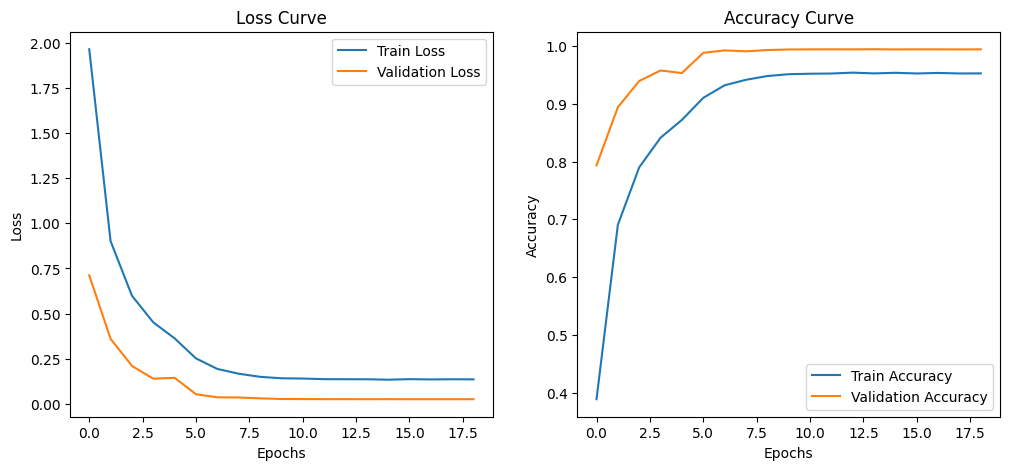

In [79]:
#Visulaizing training & validation curves
plt.figure(figsize=(12,5))

# Loss Curves
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

# Accuracy Curves
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.show()